In [17]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [18]:
env = gym.make('FrozenLake-v1', render_mode='ansi')

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [19]:
# Initialize parameters
q_table = np.zeros((state_space_size, action_space_size))
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

In [20]:
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()[0]
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):

        # exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            # exploit
            action = np.argmax(q_table[state,:]) 
        else:
            # exploreQ Learning builds a Q-table of State-Action values, with dimension (s, a), where s is the number of states and a is the number of actions. Fundamentally, a Q-table maps state and action pairs to a Q-value.
            action = env.action_space.sample()

        # Take new action
        new_state, reward, done, truncated, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state]))

        # Transition to new state
        state = new_state
        rewards_current_episode += reward
        if done == True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)



In [21]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
avg_rewards_per_thousand_episodes = []
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    avg_rewards_per_thousand_episodes.append(sum(r/1000))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.05000000000000004
2000 :  0.23600000000000018
3000 :  0.4090000000000003
4000 :  0.5500000000000004
5000 :  0.6400000000000005
6000 :  0.6590000000000005
7000 :  0.6820000000000005
8000 :  0.6780000000000005
9000 :  0.6750000000000005
10000 :  0.6890000000000005


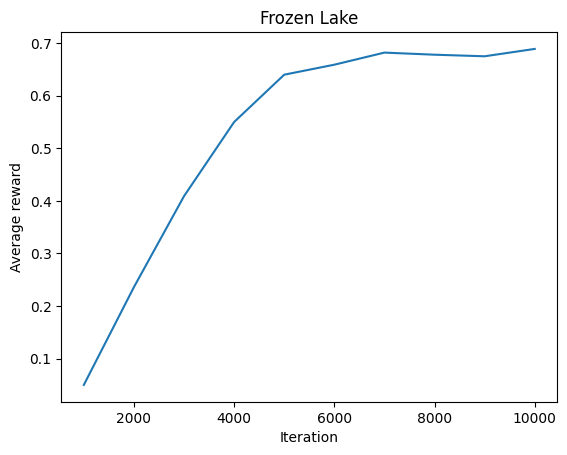

In [22]:
plt.plot(np.arange(1000, 10001, 1000), avg_rewards_per_thousand_episodes)
plt.title("Frozen Lake")
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.show()

In [23]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.55480722 0.50962274 0.50599499 0.50381004]
 [0.39926224 0.24555629 0.311688   0.49511601]
 [0.42592156 0.42123309 0.37969445 0.4676182 ]
 [0.25035654 0.31533902 0.29104107 0.45357346]
 [0.57862206 0.4221483  0.51616718 0.27661262]
 [0.         0.         0.         0.        ]
 [0.43574771 0.09163483 0.21165806 0.14218332]
 [0.         0.         0.         0.        ]
 [0.3467503  0.46644684 0.43745332 0.60760972]
 [0.51655379 0.66620714 0.49473279 0.38122808]
 [0.6700661  0.40365234 0.45878452 0.42758493]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.36163149 0.3039219  0.73702214 0.44149354]
 [0.73962453 0.86709582 0.7321464  0.7960311 ]
 [0.         0.         0.         0.        ]]


In [24]:
# watch the trained agent play the game
env = gym.make('FrozenLake-v1', render_mode='human')
for episode in range(3):
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, truncated, info = env.step(action)
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(1)
            else:
                print("****You fell through a hole!****")
                time.sleep(1)
                clear_output(wait=True)
            break
        state = new_state
env.close()

****You reached the goal!****
